In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [2]:
data = pd.read_csv("data_for_lr.csv")

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull()

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
695,False,False
696,False,False
697,False,False
698,False,False


In [6]:
data.isnull().sum()

x    0
y    1
dtype: int64

```The dropna() method removes the rows that contains NULL values.```

In [7]:
data = data.dropna()
print("Shape of data: ", data.shape)

Shape of data:  (699, 2)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


## ```Splitting Data```

In [9]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# validate data input and output

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:699]).reshape(199, 1)

In [10]:
np.array(data.x[0:500]).reshape(500, 1)

array([[ 24.],
       [ 50.],
       [ 15.],
       [ 38.],
       [ 87.],
       [ 36.],
       [ 12.],
       [ 81.],
       [ 25.],
       [  5.],
       [ 16.],
       [ 16.],
       [ 24.],
       [ 39.],
       [ 54.],
       [ 60.],
       [ 26.],
       [ 73.],
       [ 29.],
       [ 31.],
       [ 68.],
       [ 87.],
       [ 58.],
       [ 54.],
       [ 84.],
       [ 58.],
       [ 49.],
       [ 20.],
       [ 90.],
       [ 48.],
       [  4.],
       [ 25.],
       [ 42.],
       [  0.],
       [ 60.],
       [ 93.],
       [ 39.],
       [  7.],
       [ 21.],
       [ 68.],
       [ 84.],
       [  0.],
       [ 58.],
       [ 19.],
       [ 36.],
       [ 19.],
       [ 59.],
       [ 51.],
       [ 19.],
       [ 33.],
       [ 85.],
       [ 44.],
       [  5.],
       [ 59.],
       [ 14.],
       [  9.],
       [ 75.],
       [ 69.],
       [ 10.],
       [ 17.],
       [ 58.],
       [ 74.],
       [ 21.],
       [ 51.],
       [ 19.],
       [ 50.],
       [ 2

In [11]:
print(f"Training data shape = {train_input.shape}")
print(f"Training data shape = {train_output.shape}")
print(f"Testing data shape = {test_input.shape}")
print(f"Testing data shape = {test_output.shape}")

Training data shape = (500, 1)
Training data shape = (500, 1)
Testing data shape = (199, 1)
Testing data shape = (199, 1)


## ``Linear Regression``

### $Forward$ $propogation$
``f(x) = m*x + c``

In [12]:
def forward_propagation(train_input, parameters):

    m = parameters['m']
    c = parameters['c']

    predictions = np.multiply(m, train_input) + c
    
    return predictions

## $Cost$ $Function$
`` ∑(1/2*n * (y-f(x)**2)) ``

In [13]:
def cost_function(predictions, train_output):

    cost = np.mean((train_output - predictions) ** 2) * 0.5
    
    return cost

## $Gradient$ $descent$ $for$ $backpropogation: $
`` df = ∑(f(x) - y)/n `` 

`` dm = df * x ``

`` dc = df * 1 ``

In [14]:
def backward_propagation(train_input, train_output, predictions):

    derivatives = dict()

    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)

    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## $Update$ $Parameter: $
`` m = m - (learning_rate * dm) ``

`` learning_rate = ∝ ``

`` c = c - (learning_rate * dc) ``

In [15]:
def update_parameters(parameters, derivatives, learning_rate):

    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

## $Model$ $Training: $

In [16]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## $Training $

Iteration = 1, Loss = 2036.5682056326555


<Figure size 640x480 with 0 Axes>

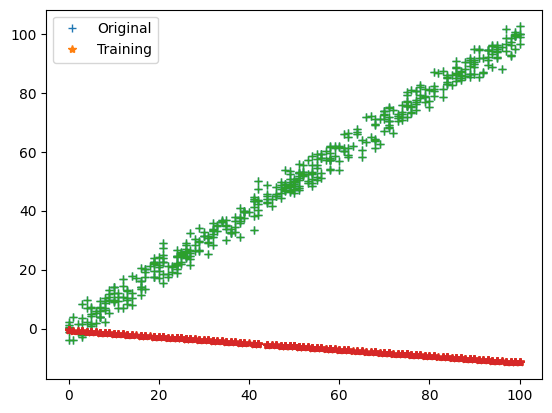

Iteration = 2, Loss = 926.1412450309083


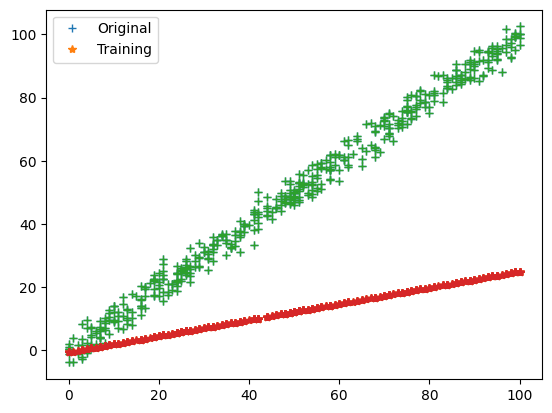

Iteration = 3, Loss = 422.3393024583929


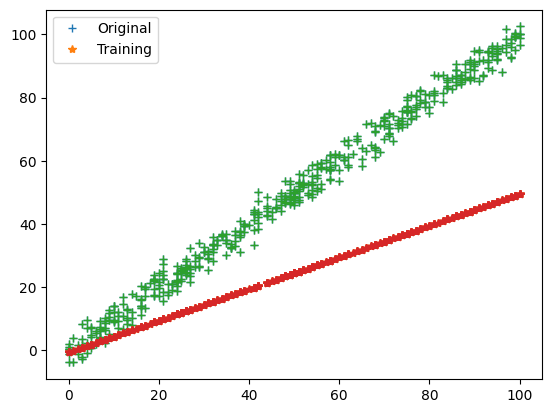

Iteration = 4, Loss = 193.76380248864163


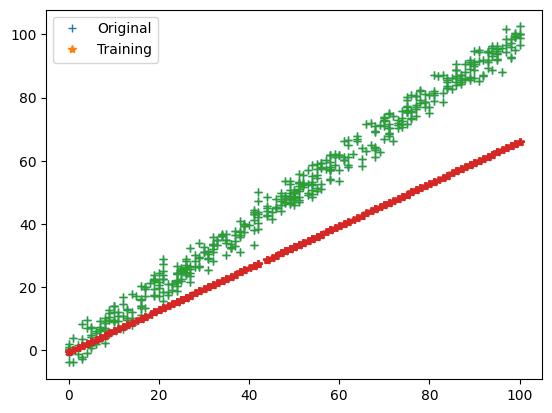

Iteration = 5, Loss = 90.05884437994507


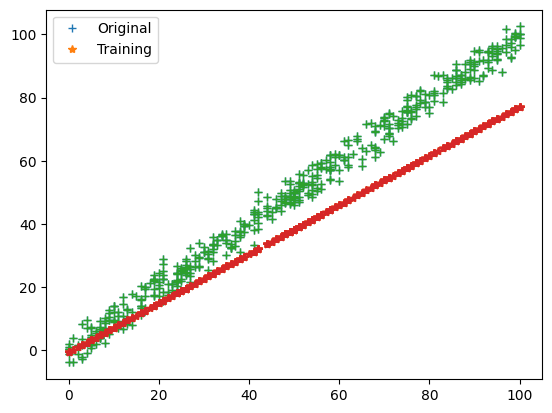

Iteration = 6, Loss = 43.00778942539761


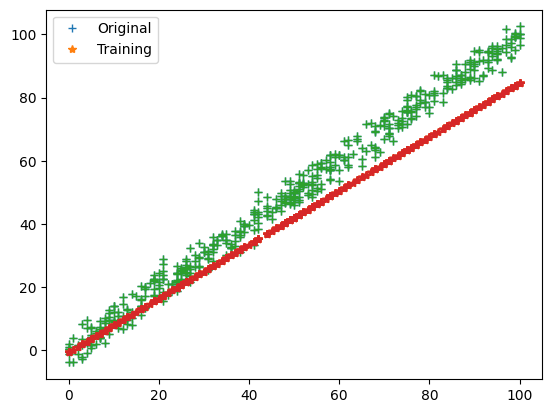

Iteration = 7, Loss = 21.660673084115487


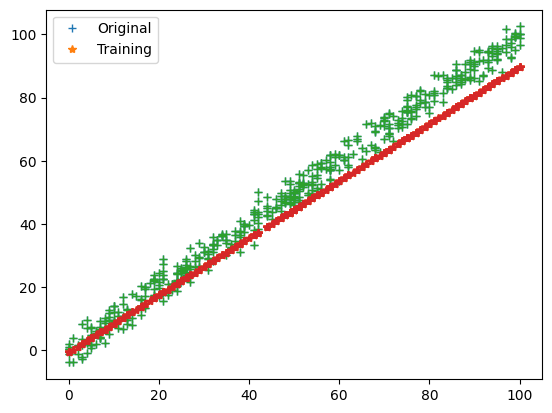

Iteration = 8, Loss = 11.97546216244348


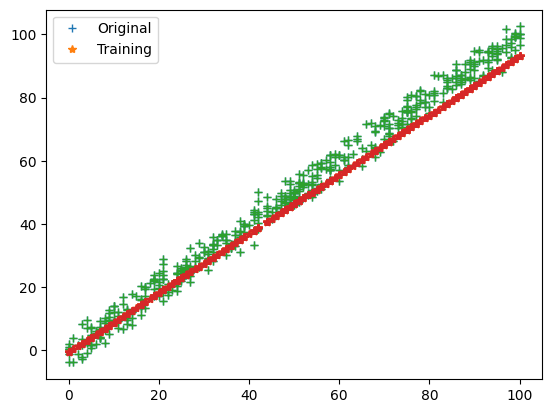

Iteration = 9, Loss = 7.581270646885551


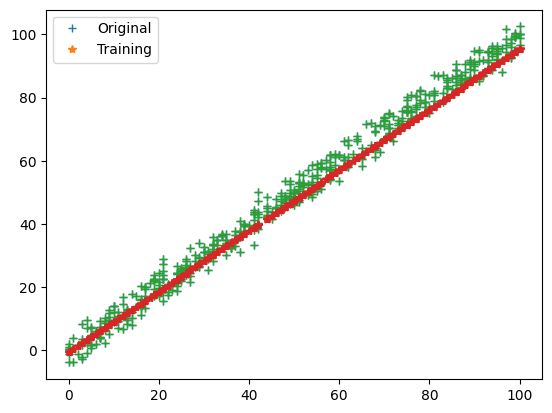

Iteration = 10, Loss = 5.587620496462563


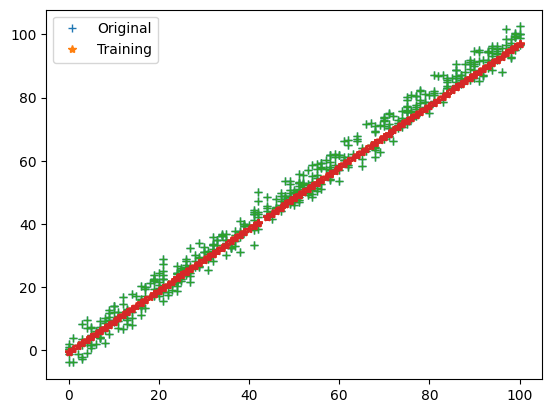

Iteration = 11, Loss = 4.683098622369714


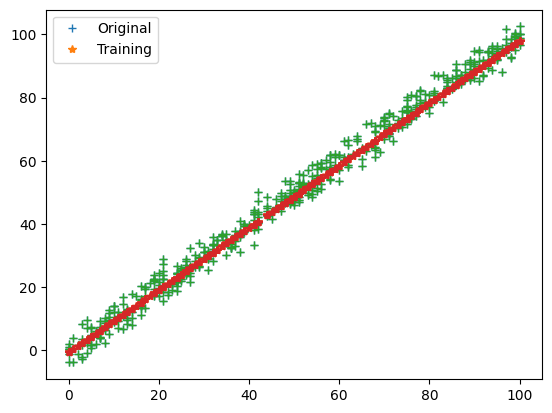

Iteration = 12, Loss = 4.272715453641072


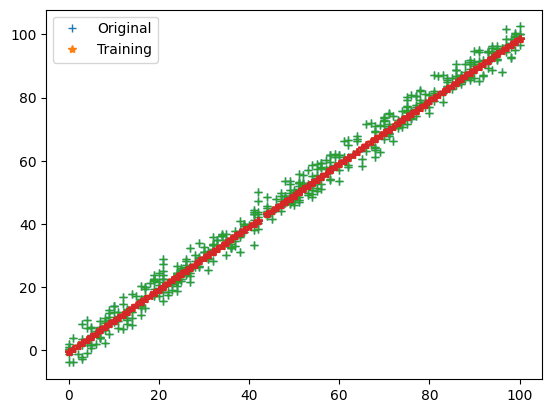

Iteration = 13, Loss = 4.086523562894411


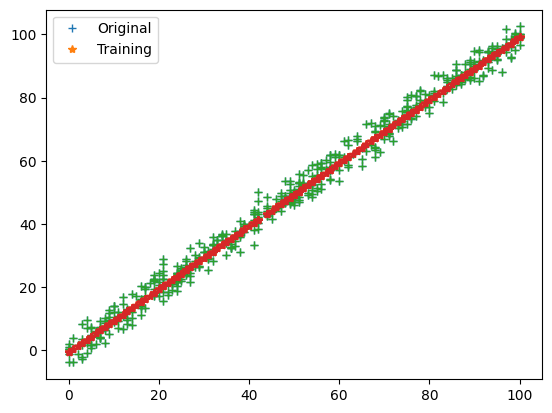

Iteration = 14, Loss = 4.002047503321517


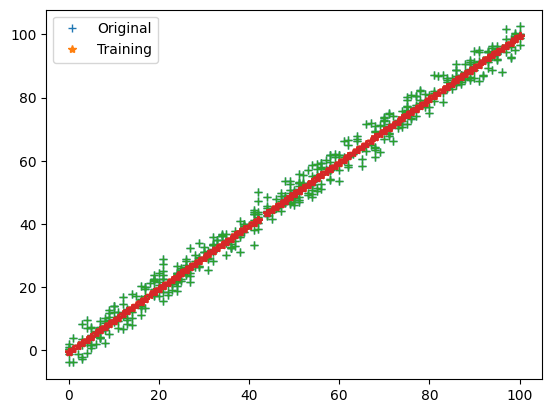

Iteration = 15, Loss = 3.9637200290466597


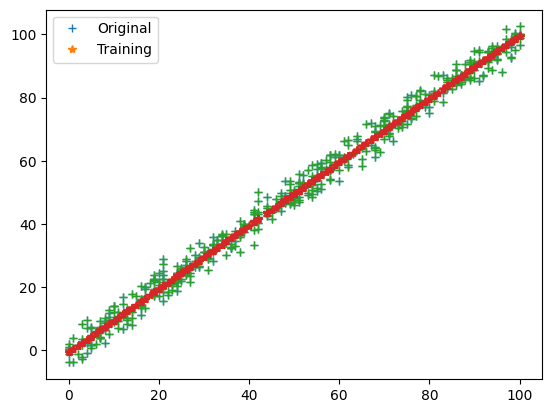

Iteration = 16, Loss = 3.946330219067441


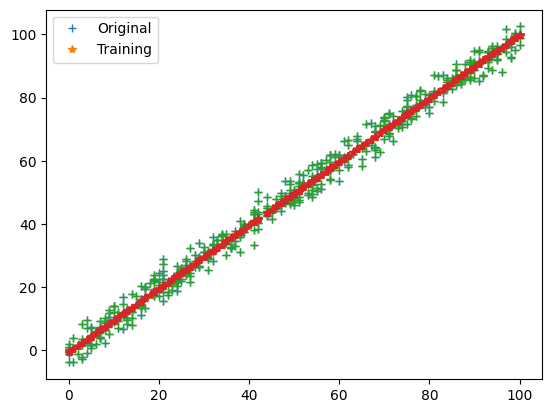

Iteration = 17, Loss = 3.9384398506004152


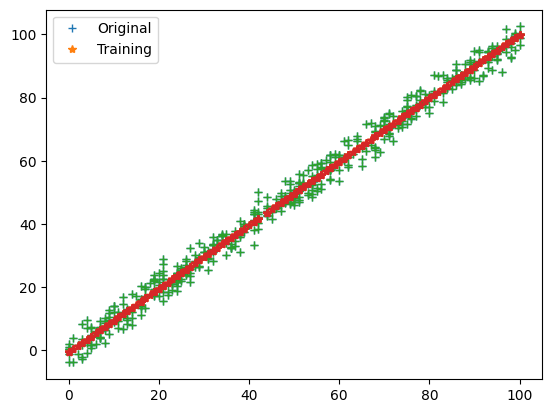

Iteration = 18, Loss = 3.9348593892992896


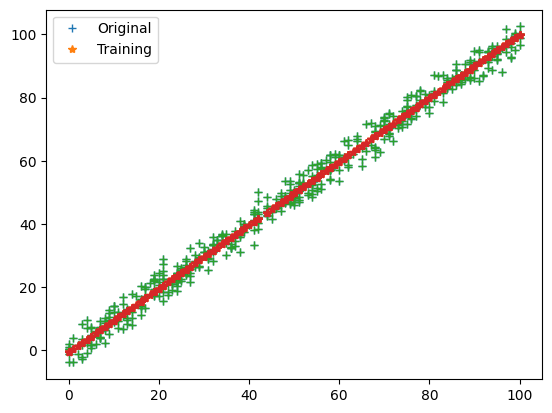

Iteration = 19, Loss = 3.9332343376830017


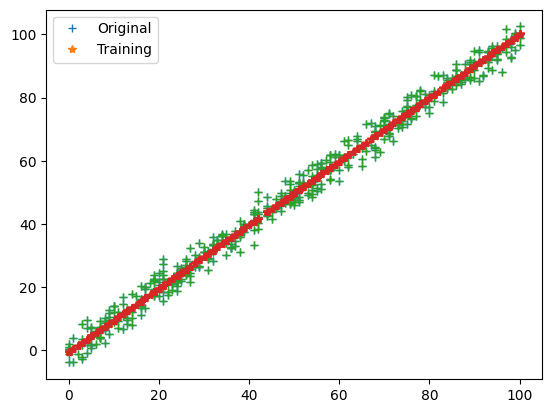

Iteration = 20, Loss = 3.9324964576364563


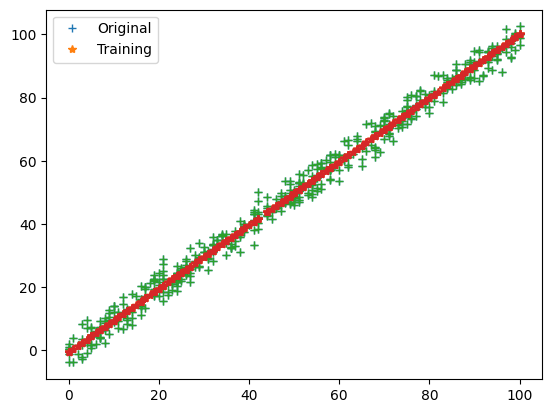

In [17]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [18]:
print(parameters)

{'m': 1.0068457360025966, 'c': -0.6494025431147172}


In [19]:
loss

[2036.5682056326555,
 926.1412450309083,
 422.3393024583929,
 193.76380248864163,
 90.05884437994507,
 43.00778942539761,
 21.660673084115487,
 11.97546216244348,
 7.581270646885551,
 5.587620496462563,
 4.683098622369714,
 4.272715453641072,
 4.086523562894411,
 4.002047503321517,
 3.9637200290466597,
 3.946330219067441,
 3.9384398506004152,
 3.9348593892992896,
 3.9332343376830017,
 3.9324964576364563]

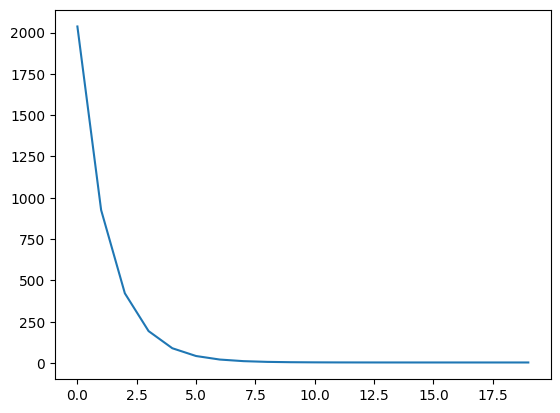

In [20]:
plt.plot(loss)

## $Let's $ $ Predict: $

In [25]:
test_predictions = test_input * parameters['m'] + parameters['c']

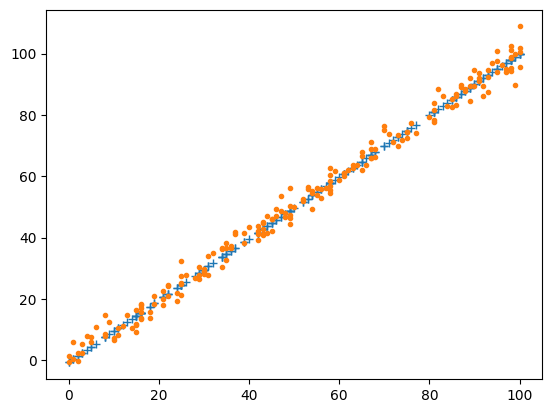

In [26]:
plt.plot(test_input, test_predictions, "+")
plt.plot(test_input, test_output, ".")
plt.show()

## $Cost $ $prediction: $

In [27]:
cost_function(test_output, test_predictions)

4.089514568103734

`` This above value of 4.0895 means we are +- 4.0895 close to our actual value. ``